# Redes Neurais Artificiais – Atividade Avaliativa 2.1

### Aprendizado Supervisionado no Neurônio Perceptron

#### 2.1. Parte I – Resolvendo um Problema Linearmente Separável

In [1]:
# import os
# from os.path import expanduser

# os.chdir(expanduser("~"))

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def conv_inp_out(arquivo):
  N = 3
  data_np = np.fromfile('data/'+arquivo)
  data = np.ndarray((int(len(data_np)/N),N), buffer=data_np)
  X = data[:,:N-1]
  yd = data[:,N-1]
  return (X, yd, data)


In [4]:
X, yd, data = conv_inp_out('dataAll.txt')

In [5]:
data.shape

(1000, 3)

In [6]:
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [7]:
X[:5]

array([[-363.7884,  244.1423],
       [ 328.7572, -256.7658],
       [-164.9827,  613.2164],
       [ 536.5905,  764.9575],
       [ 314.2297,  343.8375]])

In [8]:
yd[:5]

array([0., 1., 0., 0., 0.])

In [9]:
#! curl -o dataAll.txt "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"
#! wget "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"

Função de ativação Degrau com limiar = 0 / Taxa de aprendizado = 0.1 / Pesos = [-0.5:0.5] 

Executar o algoritmo até a convergencia

In [10]:
def degrau_gen(theta = 0):
  def f(u):
    return np.where(u >= theta, 1, 0)
  return f

In [11]:
# exemplo de funcionamento
limiar = 0
degrau = degrau_gen(limiar)
print(degrau(-7), degrau(3))

0 1


In [12]:
class Perceptron(object):
    """Perceptron de Rosenblatt
    """
    def __init__(self, ativacao = degrau_gen(), apz=0.1, ini_intervalo = -0.5, fim_intervalo = 0.5):
        self.ativacao = ativacao
        self.apz = apz
        self.ini_intervalo = ini_intervalo
        self.fim_intervalo = fim_intervalo
        self.x0 = -1

    def fit(self, X, yd, n_iteracoes = None, print_ajuste = False):
        entradas = np.insert(X, 0, self.x0, axis=1)

        self.w_ = np.random.uniform(self.ini_intervalo, self.fim_intervalo, entradas.shape[1])
        print('Pesos iniciais:', self.w_)
        epcs = 0
        ajustes = 0

        while True:
            ajustes_peso_epoca = 0

            for xi, target in zip(entradas, yd):
                y = self.predict(xi)
                erro_ = target - y

                if erro_ != 0:
                    delta = self.apz * erro_ * xi
                    self.w_ += delta

                    ajustes_peso_epoca += 1
                    if print_ajuste:
                      print("Pesos ajustados:", self.w_)
            epcs+=1
            print(f"Ajustes em época {epcs}: {ajustes_peso_epoca}")
            if (ajustes_peso_epoca == 0 if n_iteracoes is None else epcs == n_iteracoes):
                break
            else:
                ajustes += ajustes_peso_epoca

        print("O número total de ajustes no vetor de pesos:", ajustes)
        print("O número de épocas até a convergência:", epcs)
        self.epocas = epcs
        self.ajustes = ajustes
        return self

    def u(self, X):
        """Cálculo da entrada da rede antes da ativação"""
        return np.dot(X, self.w_)

    def predict(self, X):
        return self.ativacao(self.u(X))

In [13]:
rede = Perceptron()

In [14]:
rede_ajustada = rede.fit(X, yd, print_ajuste=True)

Pesos iniciais: [0.19847395 0.26120925 0.43778494]
Pesos ajustados: [  0.29847395  36.64004925 -23.97644506]
Pesos ajustados: [   0.39847395  -17.01900075 -100.47219506]
Pesos ajustados: [  0.29847395  55.77701925 -64.64263506]
Pesos ajustados: [  0.19847395 138.37571925  15.21319494]
Pesos ajustados: [  0.29847395 144.22147925 -63.08139506]
Pesos ajustados: [   0.39847395  104.21256925 -140.97408506]
Pesos ajustados: [  0.49847395 157.88237925 -91.88181506]
Pesos ajustados: [   0.39847395  104.92231925 -148.75127506]
Pesos ajustados: [  0.49847395 164.48183925 -98.62894506]
Pesos ajustados: [   0.39847395  118.95720925 -164.26487506]
Pesos ajustados: [  0.49847395 209.67306925 -89.55155506]
Pesos ajustados: [   0.39847395  151.89207925 -149.85970506]
Pesos ajustados: [   0.29847395  103.62551925 -198.32942506]
Pesos ajustados: [   0.19847395  174.07286925 -156.21315506]
Pesos ajustados: [ 9.84739524e-02  1.27230869e+02 -2.07623025e+02]
Pesos ajustados: [-1.52604762e-03  1.97094499e+02

[Calculate the Decision Boundary of a Single Perceptron - Visualizing Linear Separability](https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38)

* Ax + By - C = 0

* w1x + w2y + b

* w1 * x1 + w2 * x2 + b

* x-intercept: 
x = -(b - w2y) / w1

if y == 0

x = -(b - w2 * 0) / w1

x = -b / w1

* y-intercept: 
y = -(b - w1x) / w2

if x == 0

y = -(b - w1 * 0) / w2

y = -b / w2

* point_1 = (0, -b / w2) 

* point_2 = (-b / w1, 0)

* m = (y2 - y1) / (x2 - x1)

m = (0 - -(b / w2)) / (-(b / w1) - 0)

* m = -(b / w2) / (b / w1)

* y = m.x + y0

y = (-(b / w2) / (b / w1))x + (-b / w2)

b = w0 * x0 = -w0

**y = (-w1/w2)x + w0/w2**


In [15]:
x_reta = np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1]))
x_reta

array([-999.9963    , -959.2445898 , -918.49287959, -877.74116939,
       -836.98945918, -796.23774898, -755.48603878, -714.73432857,
       -673.98261837, -633.23090816, -592.47919796, -551.72748776,
       -510.97577755, -470.22406735, -429.47235714, -388.72064694,
       -347.96893673, -307.21722653, -266.46551633, -225.71380612,
       -184.96209592, -144.21038571, -103.45867551,  -62.70696531,
        -21.9552551 ,   18.7964551 ,   59.54816531,  100.29987551,
        141.05158571,  181.80329592,  222.55500612,  263.30671633,
        304.05842653,  344.81013673,  385.56184694,  426.31355714,
        467.06526735,  507.81697755,  548.56868776,  589.32039796,
        630.07210816,  670.82381837,  711.57552857,  752.32723878,
        793.07894898,  833.83065918,  874.58236939,  915.33407959,
        956.0857898 ,  996.8375    ])

In [16]:
w0, w1, w2 = rede_ajustada.w_

In [17]:
print(w0, w1, w2)

-0.30152604762069224 323.6702392483486 -323.0730550637426


In [18]:
y_reta = -w1/w2 * x_reta + w0/w2
y_reta

array([-1001.84380922,  -961.01677155,  -920.18973387,  -879.36269619,
        -838.53565851,  -797.70862084,  -756.88158316,  -716.05454548,
        -675.22750781,  -634.40047013,  -593.57343245,  -552.74639478,
        -511.9193571 ,  -471.09231942,  -430.26528174,  -389.43824407,
        -348.61120639,  -307.78416871,  -266.95713104,  -226.13009336,
        -185.30305568,  -144.476018  ,  -103.64898033,   -62.82194265,
         -21.99490497,    18.8321327 ,    59.65917038,   100.48620806,
         141.31324573,   182.14028341,   222.96732109,   263.79435877,
         304.62139644,   345.44843412,   386.2754718 ,   427.10250947,
         467.92954715,   508.75658483,   549.58362251,   590.41066018,
         631.23769786,   672.06473554,   712.89177321,   753.71881089,
         794.54584857,   835.37288625,   876.19992392,   917.0269616 ,
         957.85399928,   998.68103695])

In [19]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [20]:
classe_0 = data_plot.loc[data_plot['y'] == 0]
classe_1 = data_plot.loc[data_plot['y'] == 1]

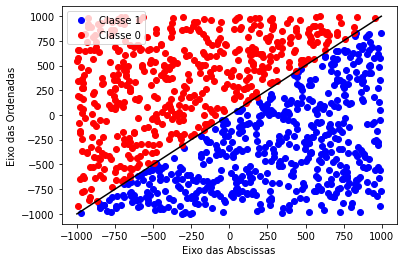

In [21]:
plt.plot(classe_1.x1, classe_1.x2, 'bo', label='Classe 1')
plt.plot(classe_0.x1, classe_0.x2, 'ro', label='Classe 0')

plt.plot(x_reta, y_reta, 'black')

plt.xlabel('Eixo das Abscissas')
plt.ylabel('Eixo das Ordenadas')
plt.legend(loc='upper left')
plt.show()

#### 2.2. Parte II – Experimentação

In [22]:
X, yd, _ = conv_inp_out('data0.txt')

In [23]:
apzs = [0.4, 0.1, 0.01]
lmt = [(-100,100), (-0.5,0.5)]
n = 10

In [24]:
data_list = list()
for ini, fim in lmt:
  for apz in apzs:
    rede = Perceptron(apz=apz, ini_intervalo=ini, fim_intervalo=fim)
    for i in range(1,n+1):
      rede_ajustada = rede.fit(X, yd)
      data_list.append((apz, str(ini)+','+str(fim), rede_ajustada.ajustes, rede_ajustada.epocas))

A saída de streaming foi truncada nas últimas 5000 linhas.
Ajustes em época 90: 18
Ajustes em época 91: 18
Ajustes em época 92: 18
Ajustes em época 93: 18
Ajustes em época 94: 18
Ajustes em época 95: 18
Ajustes em época 96: 18
Ajustes em época 97: 18
Ajustes em época 98: 18
Ajustes em época 99: 18
Ajustes em época 100: 18
Ajustes em época 101: 17
Ajustes em época 102: 16
Ajustes em época 103: 15
Ajustes em época 104: 15
Ajustes em época 105: 15
Ajustes em época 106: 15
Ajustes em época 107: 15
Ajustes em época 108: 15
Ajustes em época 109: 14
Ajustes em época 110: 14
Ajustes em época 111: 13
Ajustes em época 112: 13
Ajustes em época 113: 12
Ajustes em época 114: 11
Ajustes em época 115: 11
Ajustes em época 116: 11
Ajustes em época 117: 10
Ajustes em época 118: 11
Ajustes em época 119: 9
Ajustes em época 120: 9
Ajustes em época 121: 9
Ajustes em época 122: 8
Ajustes em época 123: 8
Ajustes em época 124: 8
Ajustes em época 125: 8
Ajustes em época 126: 8
Ajustes em época 127: 8
Ajustes em

In [25]:
data = pd.DataFrame(data_list, columns=['apz','intervalo','ajustes','epocas'])

In [26]:
gb = data.groupby(['apz','intervalo'])
resumo = gb.agg(['mean','std','min']).drop([('ajustes', 'min'), ('epocas', 'mean'), ('epocas', 'std')], axis = 1)
resumo

ajustes              epocas
                   mean          std    min
apz  intervalo                             
0.01 -0.5,0.5      66.5    42.662109      2
     -100,100   10526.3  6200.207058     31
0.10 -0.5,0.5      10.5     3.922867      3
     -100,100     902.3   680.162570      1
0.40 -0.5,0.5       7.2     1.398412      3
     -100,100     203.0   160.231083      1

#### 2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [27]:
X, yd, data = conv_inp_out('dataHoldout.txt')

In [28]:
data

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [29]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [30]:
classe_0 = data_plot.loc[data_plot['y'] == 0]
classe_1 = data_plot.loc[data_plot['y'] == 1]

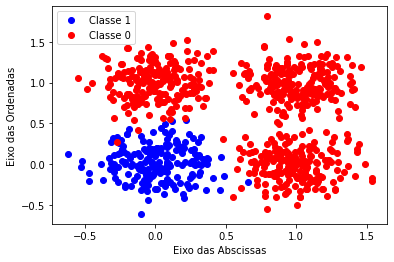

In [31]:
plt.plot(classe_1.x1, classe_1.x2, 'bo', label='Classe 1')
plt.plot(classe_0.x1, classe_0.x2, 'ro', label='Classe 0')

plt.xlabel('Eixo das Abscissas')
plt.ylabel('Eixo das Ordenadas')
plt.legend(loc='upper left')
plt.show()

In [32]:
np.random.shuffle(data)

In [33]:
train, test = np.split(data, [int(.7 * len(data))])

In [34]:
print(f'{len(train)} - treinamento; {len(test)} - teste')

560 - treinamento; 240 - teste


In [35]:
N = 3
X_train = train[:,:N-1]
yd_train = train[:,N-1]

In [36]:
rede = Perceptron()

In [37]:
rede_ajustada = rede.fit(X_train, yd_train, n_iteracoes=100)

Pesos iniciais: [ 0.03036651 -0.44365531  0.17803976]
Ajustes em época 1: 46
Ajustes em época 2: 26
Ajustes em época 3: 28
Ajustes em época 4: 28
Ajustes em época 5: 34
Ajustes em época 6: 28
Ajustes em época 7: 28
Ajustes em época 8: 27
Ajustes em época 9: 34
Ajustes em época 10: 30
Ajustes em época 11: 34
Ajustes em época 12: 30
Ajustes em época 13: 38
Ajustes em época 14: 30
Ajustes em época 15: 32
Ajustes em época 16: 36
Ajustes em época 17: 34
Ajustes em época 18: 32
Ajustes em época 19: 36
Ajustes em época 20: 30
Ajustes em época 21: 32
Ajustes em época 22: 34
Ajustes em época 23: 30
Ajustes em época 24: 36
Ajustes em época 25: 34
Ajustes em época 26: 32
Ajustes em época 27: 32
Ajustes em época 28: 36
Ajustes em época 29: 32
Ajustes em época 30: 32
Ajustes em época 31: 32
Ajustes em época 32: 32
Ajustes em época 33: 34
Ajustes em época 34: 36
Ajustes em época 35: 34
Ajustes em época 36: 32
Ajustes em época 37: 36
Ajustes em época 38: 34
Ajustes em época 39: 32
Ajustes em época 40

In [38]:
def get_confusion_matrix(data, preditor):
    true_class = 1

    # predicoes corretas
    tp = 0
    tn = 0
    
    # predicoes incorretas
    fp = 0
    fn = 0
    
    for [x1, x2, yd] in (data):
        v_predito = preditor.predict([-1, x1, x2])

        if yd == true_class:
          if v_predito == yd:
            tp += 1
          else:
            fp += 1
        else:
          if v_predito == yd:
            tn += 1
          else:
            fn += 1
    
    return np.array([
                     # valores da classe positiva
                     [ tp, fp ],
                     # valores da classe negativa
                     [ fn, tn ]
                     ])

confusion_matrix = get_confusion_matrix(test, rede_ajustada)

Matriz de Confusão - Testes

In [39]:
pd.DataFrame(confusion_matrix, columns=['Predito 1', 'Predito 0'], index=['Real 1', 'Real 0'])

,Predito 1,Predito 0
Real 1,62,0
Real 0,15,163


Métricas - Treinamento

In [40]:
[[ tp, fp ],[ fn, tn ]] = get_confusion_matrix(train, rede_ajustada)

Acurácia

In [41]:
accurary = (tp+tn)/(tp+fp+tn+fn)
accurary

0.9357142857142857

Recall

In [42]:
recall = tp/(tp+fn)
recall

0.8

Precisão

In [43]:
precision = tp/(tp+fp)
precision

0.9855072463768116

F-score

In [44]:
f_score = 2*(precision*recall)/(precision+recall)
f_score

0.8831168831168831

Gráficos

In [51]:
X_test = test[:,:N-1]

In [47]:
data_plot_train = pd.DataFrame(train, columns = ['x1', 'x2', 'y'])
data_plot_test = pd.DataFrame(test, columns = ['x1', 'x2', 'y'])

In [49]:
classe_0_train = data_plot_train.loc[data_plot_train['y'] == 0]
classe_1_train = data_plot_train.loc[data_plot_train['y'] == 1]
classe_0_test = data_plot_test.loc[data_plot_test['y'] == 0]
classe_1_test = data_plot_test.loc[data_plot_test['y'] == 1]

In [52]:
x_reta_train = np.linspace(np.amin(X_train[:,:1]),np.amax(X_train[:,:1]))
x_reta_test = np.linspace(np.amin(X_test[:,:1]),np.amax(X_test[:,:1]))

In [53]:
w0, w1, w2 = rede_ajustada.w_

In [54]:
y_reta_train = -w1/w2 * x_reta_train + w0/w2
y_reta_test = -w1/w2 * x_reta_test + w0/w2

Text(0.5, 1.0, 'Teste')

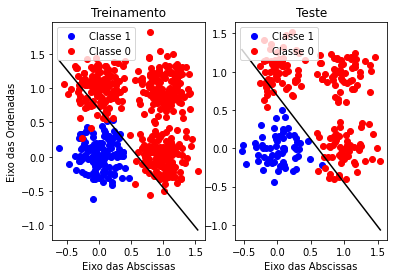

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(classe_1_train.x1, classe_1_train.x2, 'bo', label='Classe 1')
ax1.plot(classe_0_train.x1, classe_0_train.x2, 'ro', label='Classe 0')
ax1.plot(x_reta_train, y_reta_train, 'black')
ax1.set_xlabel('Eixo das Abscissas')
ax1.set_ylabel('Eixo das Ordenadas')
ax1.legend(loc='upper left')
ax1.set_title('Treinamento')

ax2.plot(classe_1_test.x1, classe_1_test.x2, 'bo', label='Classe 1')
ax2.plot(classe_0_test.x1, classe_0_test.x2, 'ro', label='Classe 0')
ax2.plot(x_reta_test, y_reta_test, 'black')
ax2.set_xlabel('Eixo das Abscissas')
ax2.legend(loc='upper left')
ax2.set_title('Teste')